In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import train_test_split
from sklearn import metrics

from operator import itemgetter

/Users/analeegraig/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/analeegraig/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/analeegraig/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/analeegraig/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/analeegraig/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the re

In [2]:
df = pd.read_csv('transformed_dataframe.csv')

In [3]:
df.head()

,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.230073,-0.202770,4,1,3,7,5,1.053769,0.880629,0.533895,...,0,0,0,1,0,0,0,0,1,0
1,0.473236,-0.086107,4,1,3,6,8,0.159469,-0.427190,-0.573757,...,0,0,0,1,0,0,0,0,1,0
2,-0.089411,0.081281,3,1,3,7,5,0.987524,0.832191,0.341751,...,0,0,0,1,0,0,0,0,1,0
3,-0.464509,-0.091179,3,1,3,7,5,-1.860986,-0.717817,-0.573757,...,0,0,0,1,1,0,0,0,0,0
4,0.660785,0.386636,3,1,3,8,5,0.954402,0.735316,1.404192,...,0,0,0,1,0,0,0,0,1,0


## Linear Model

In [4]:
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [6]:
lm = LinearRegression()

In [7]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
predictions_linear = lm.predict(X_test)

### R^2

In [9]:
metrics.r2_score(y_test, predictions_linear)

0.8901128228093489

## Lasso

In [16]:
r2_lasso = []
for alpha in np.linspace(0,1.1,num=20000):
    lasso = linear_model.Lasso(alpha)
    lasso.fit(X_train, y_train)
    predictions_lasso = lasso.predict(X_test)
    r2_num = metrics.r2_score(y_test, predictions_lasso)
    r2_lasso.append([alpha,r2_num])

/Users/analeegraig/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  after removing the cwd from sys.path.
/Users/analeegraig/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/analeegraig/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [17]:
r2_maximized_lasso = sorted(r2_lasso, key=itemgetter(1))[-1]

In [18]:
r2_maximized_lasso

[0.0006600330016500826, 0.8944579302658434]

In [31]:
print("\nR^2 maximized where:\n    Alpha: {:.5f}\n    R^2: {:.5f}\n".format(r2_maximized_lasso[0], r2_maximized_lasso[1]))


R^2 maximized where:
    Alpha: 0.00066
    R^2: 0.89446



## Ridge

In [13]:
r2_ridge = []
for alpha in np.linspace(0,17,num=20000):
    ridge = linear_model.Ridge(alpha)
    ridge.fit(X_train, y_train)
    predictions_ridge = ridge.predict(X_test)
    r2_num = metrics.r2_score(y_test, predictions_ridge)
    r2_ridge.append([alpha,r2_num])

In [20]:
r2_maximized_ridge = sorted(r2_ridge, key=itemgetter(1))[-1]

In [32]:
r2_maximized_ridge

[17.0, 0.8952267732818933]

In [35]:
print("\nR^2 maximized where:\n    Alpha: {:.5f}\n    R^2: {:.5f}\n".format(r2_maximized_ridge[0], r2_maximized_ridge[1]))


R^2 maximized where:
    Alpha: 17.00000
    R^2: 0.89523



#### Create instance of ridge at max value for alpha

In [23]:
ridge = linear_model.Ridge(alpha=17)

In [24]:
ridge.fit(X_train, y_train)

Ridge(alpha=17, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [25]:
predictions_ridge = ridge.predict(X_test)

In [68]:
ridge_coeffs_df = pd.DataFrame(ridge.coef_,X.columns,columns=['Coefficient'])

In [69]:
ridge_coeffs_df.head()

,Coefficient
LotFrontage,0.029652
LotArea,0.059492
LotShape,-0.010998
Utilities,0.000000
LandSlope,0.046309


In [72]:
ridge_coeffs_df.index

Index(['LotFrontage', 'LotArea', 'LotShape', 'Utilities', 'LandSlope',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=232)

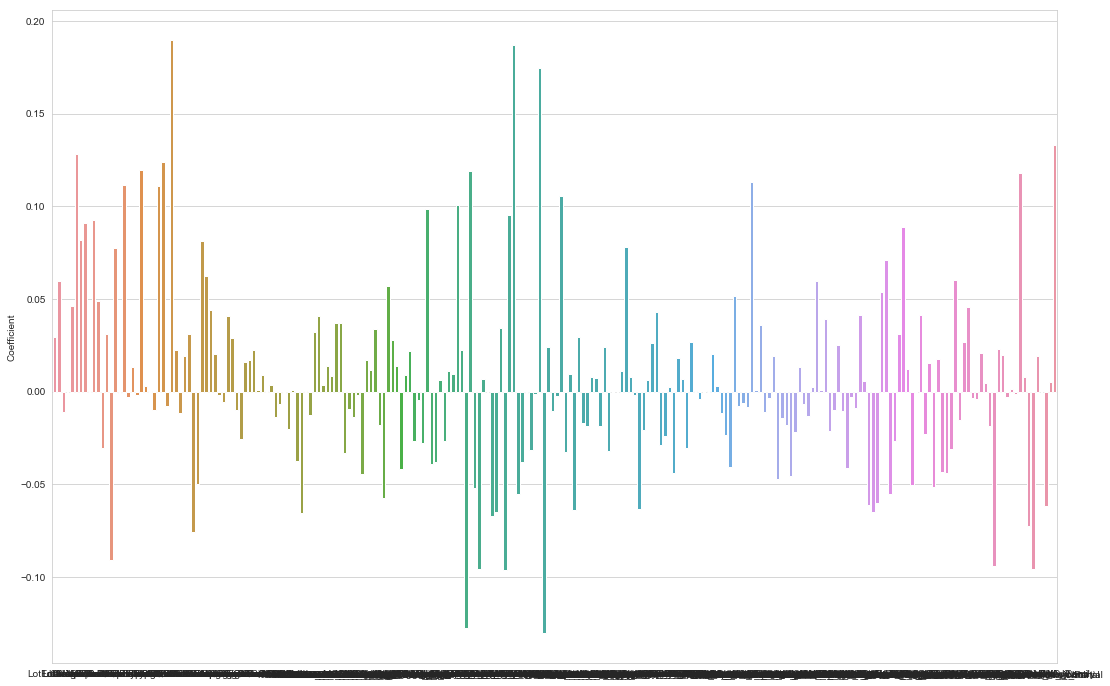

In [75]:
plt.figure(figsize=(18,12))
sns.barplot(x=ridge_coeffs_df.index,y='Coefficient',data=ridge_coeffs_df)